# Processamento Digital de Sinais
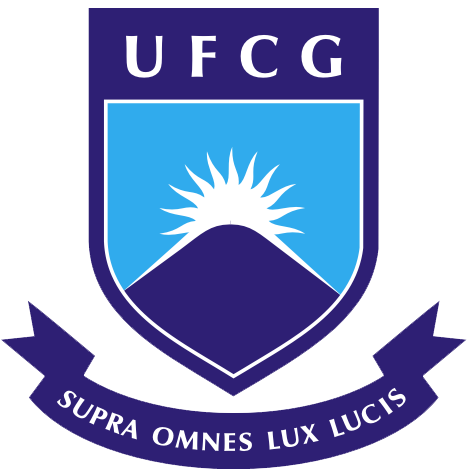

### Aluno: 
- Elmer Pimentel Farias

### Professor: 
- Dr. Edmar Candeia Gurjão, Professor do Departamento de Engenharia Elétrica da Universidade Federal de Campina Grande (UFCG)

# Análise de Hardware: Conversor Analógico-Digital em Interfaces de Áudio

## 1. Hardware Selecionado
Para esta análise, **selecionei especificamente** a interface de áudio **Focusrite Scarlett 2i2**.

Escolhi este equipamento por ser um padrão de mercado em gravações de alta fidelidade, onde o desempenho do Conversor Analógico-Digital (ADC) é o fator mais crítico para a qualidade do produto final.

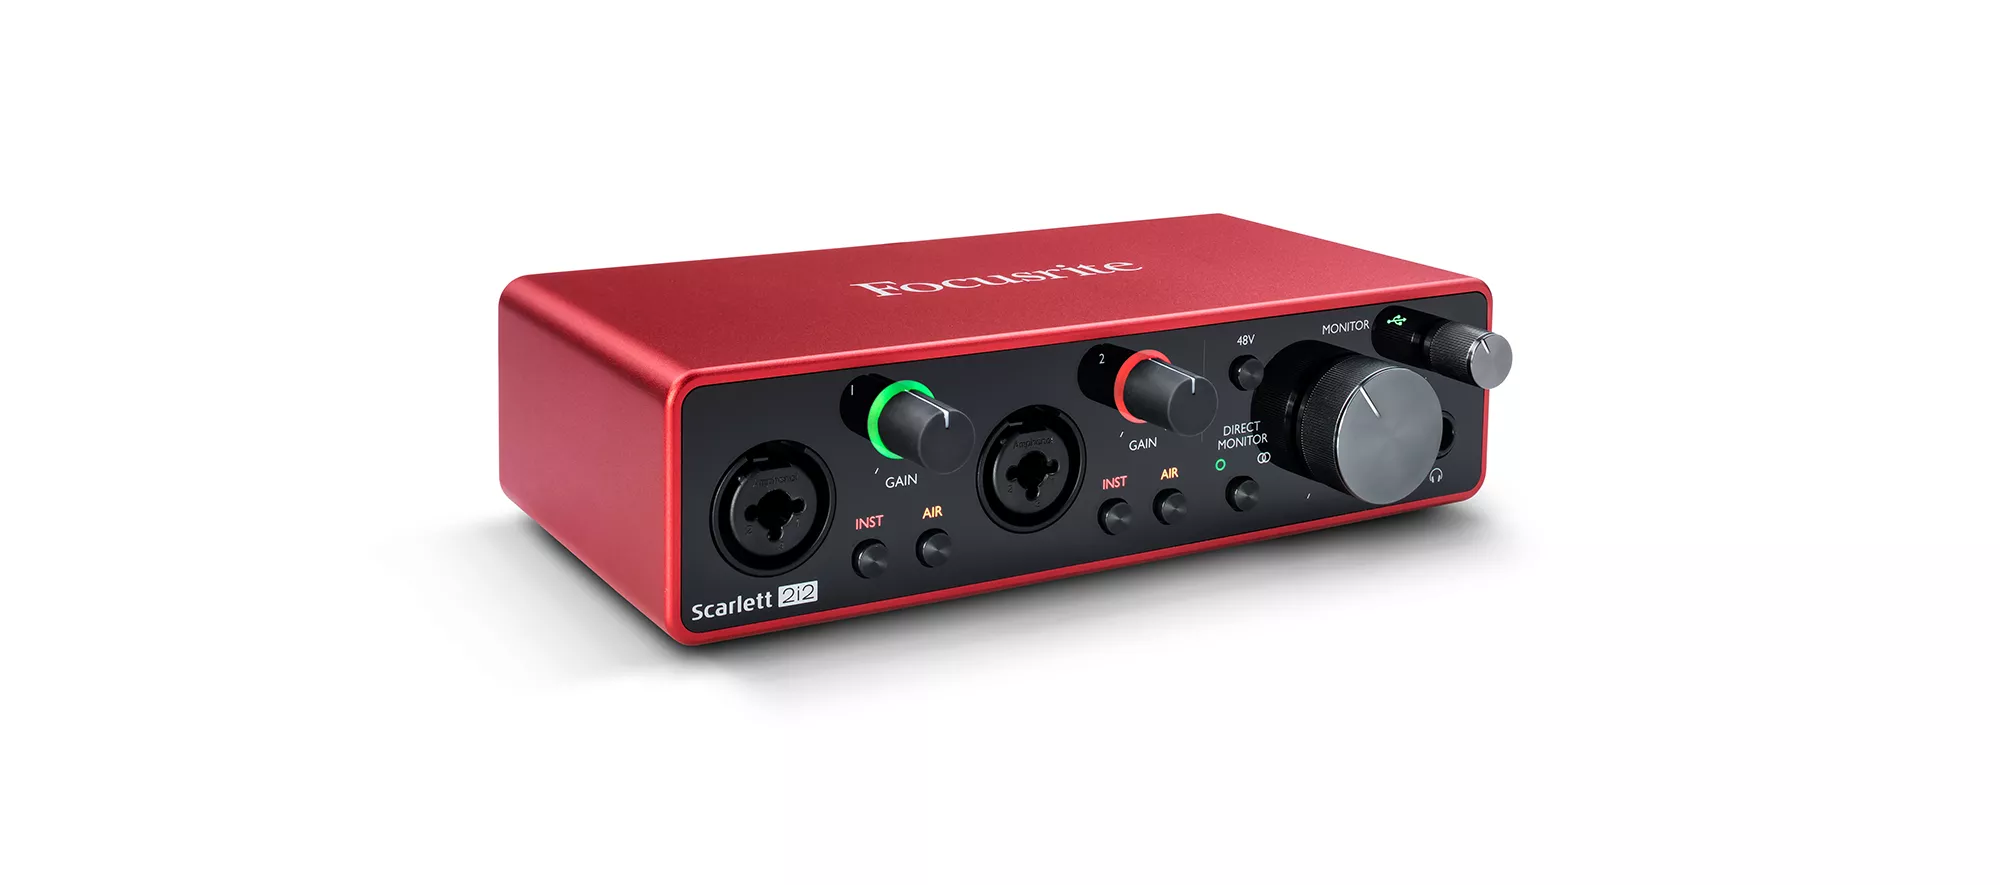



## 2. Características do Conversor A/D

O ADC presente nesta interface foi projetado com foco em **fidelidade sonora** e **baixa distorção**, diferindo de conversores de uso geral (como os de microcontroladores) que priorizam apenas a leitura de estados.

### 2.1. Resolução (Bit Depth)
* **Especificação:** **24 bits**.
* **Análise:** Enquanto um conversor comum de 10 bits oferece 1.024 níveis de quantização, o ADC de 24 bits deste hardware oferece **16.777.216 níveis**.
* **Impacto:** Essa resolução altíssima permite capturar a **dinâmica** do áudio (a diferença entre o som mais baixo e o mais alto) com extrema precisão, eliminando praticamente todo o ruído de quantização.

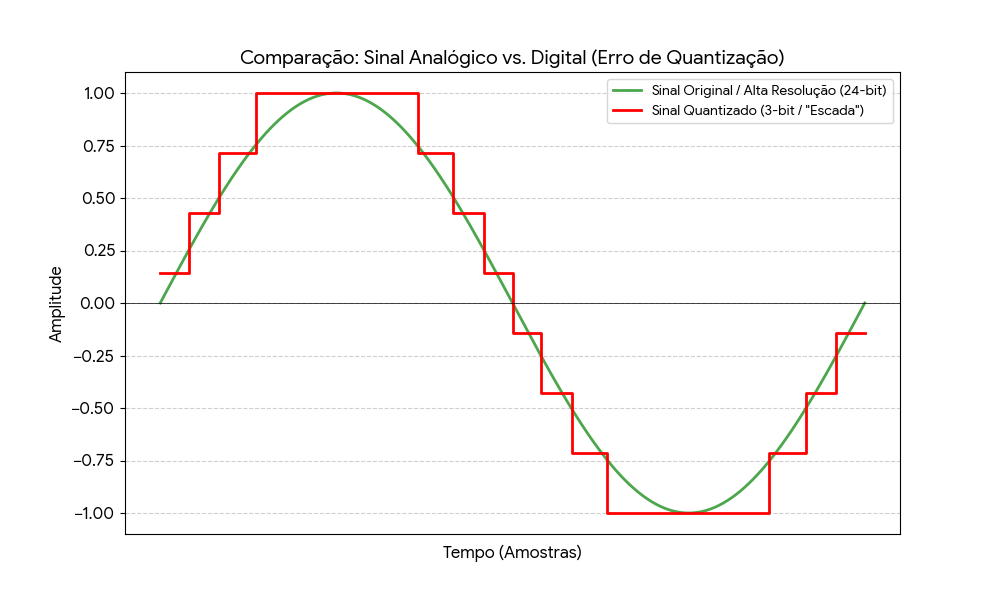

### 2.2. Taxa de Amostragem (Sampling Rate)
* **Especificação:** Suporta taxas de **44.1 kHz, 48 kHz, 88.2 kHz, 96 kHz e até 192 kHz**.
* **Análise:** Na configuração padrão de 44.1 kHz, o hardware captura o sinal analógico **44.100 vezes por segundo**.
* **Impacto:** Isso garante a reconstrução perfeita de frequências até aproximadamente 22 kHz, cobrindo com folga toda a faixa de audição humana (Teorema de Nyquist).

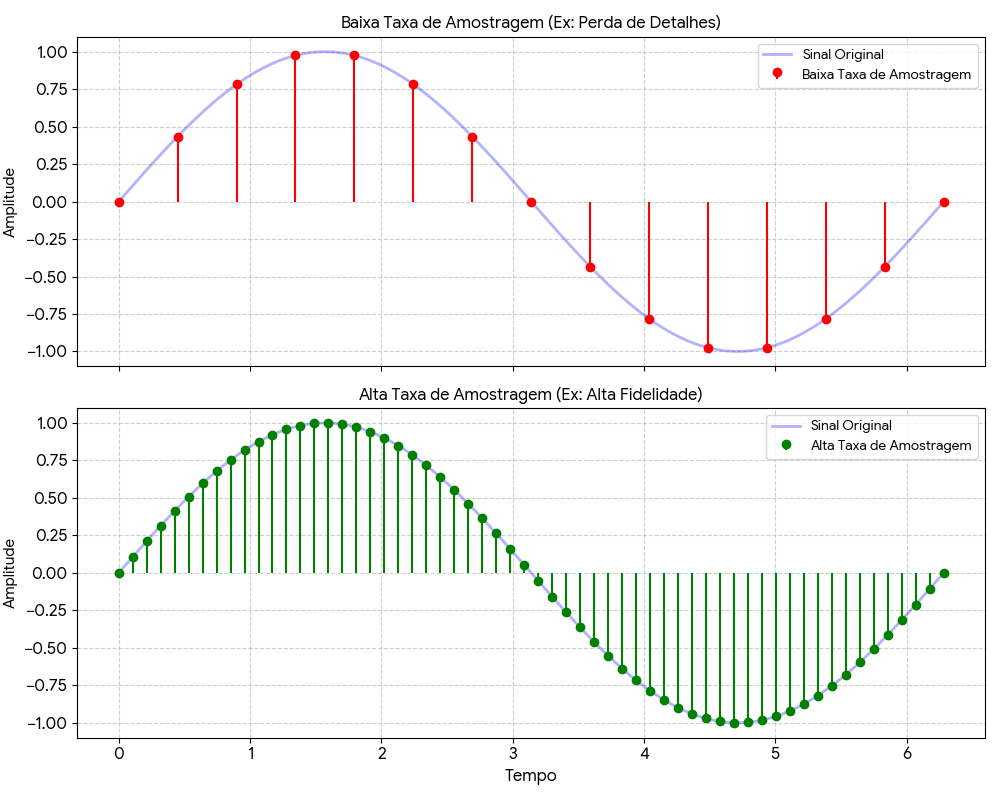


## 3. Classe de Sinais

Este conversor atende à classe de **Sinais de Áudio (Sinais AC Complexos)**.

* **Natureza:** São sinais de tensão alternada que variam rapidamente no tempo, não-periódicos (como a fala) ou periódicos complexos (como notas musicais).
* **Frequência:** Focados no espectro audível (**20 Hz a 20.000 Hz**).
* **Origem Típica:** Tensões elétricas geradas por transdutores, como cápsulas de microfones ou captadores magnéticos de instrumentos.


## 4 Demonstração Prática via Software (Python)

Como não temos o hardware físico em mãos, faremos uma **demonstração prática equivalente** utilizando a biblioteca `sounddevice` do Python. Este método utiliza o hardware de áudio do próprio computador (microfone e ADC integrado) para ilustrar o processo de amostragem.

### 4.1. O Experimento

Utilizaremos um script em Python para:

1.  **Gravar** 10 segundos de áudio do microfone do computador.
2.  **Definir** a taxa de amostragem para **44.000 Hz** (44 kHz), um padrão comum em áudio.
3.  **Visualizar** o resultado em dois gráficos distintos para entender a natureza do sinal digitalizado.

O código utilizado para este experimento é:



--- PREPARE-SE ---
Vou gravar por 10 segundos usando a taxa de 44100.0Hz.
Gravação de 10 segundos iniciará em...
3...
2...
1... FALE!
--- GRAVAÇÃO CONCLUÍDA ---


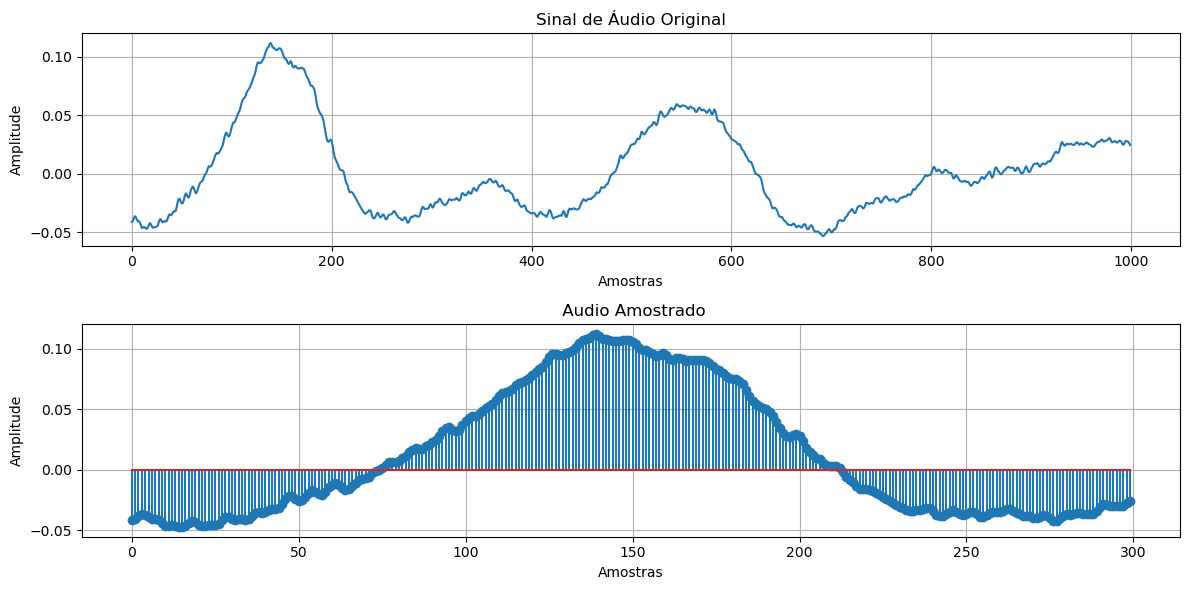

In [12]:
import sounddevice as sd
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import scipy.signal as sig

Fs = 44100.0       # Taxa de Amostragem 
duracao = 10       # Segundos de gravação
print(f"--- PREPARE-SE ---")
print(f"Vou gravar por {duracao} segundos usando a taxa de {Fs}Hz.")

print("Gravação de 10 segundos iniciará em...")
time.sleep(1); print("3..."); time.sleep(1); print("2..."); time.sleep(1); print("1... FALE!")
# Gravação (Bloqueante - o código espera terminar)

audio_original = sd.rec(int(duracao * Fs), samplerate=int(Fs), channels=1)
sd.wait() # Aguarda a gravação terminar
print("--- GRAVAÇÃO CONCLUÍDA ---")

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("Sinal de Áudio Original")
plt.plot(audio_original[:1000]) #podemos ver o sinal inteiro basta deixar o slice vazio :)
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.title(" Audio Amostrado")
plt.stem(audio_original[:300])
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()



### 4.2. Análise dos Resultados

Ao executar o código, obtivemos os seguintes gráficos que ilustram perfeitamente o conceito de sinal digital:

  * **Gráfico Superior (Visão Geral):** Exibe um recorte de 1000 amostras (aprox. 22ms), aparenta ser uma forma de onda contínua (analógica), análoga ao sinal elétrico que entra na interface.
  * **Gráfico Inferior (Zoom nas Amostras):** Para uma melhor visualização do sinal em uma frequência de amostragem de 44,1khz, daremos um zoom nas 300 primeiras amostras e conseguimos visualizar basicamente a função do conversor ADC amostrando o sinal analógico para o sinal digital. Cada haste vertical representa o momento exato em que o ADC da interface capturou a voltagem e a converteu em um número.